In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from tqdm import tqdm

Queremos calcular el segundo momento de la distribución usando el método de Montecarlo.
$$ x \sim exp(4) $$ 
$$ f(x) = \frac{1}{4}e^{\frac{-x}{4}} $$  
$$ E(x^{2}) = \int_{0}^{\infty}\frac{1}{4} x^{2} e^{\frac{-x}{4}} dx = 32$$

Hacer cambio de variable $y = \frac{1}{1+x}$

In [2]:
def FunctionExp(y):
    
    if(y.any() != 0):
        return ( (1/y -1)**2*np.exp( -(1/y-1)/4 ) )/(4*y**2)
    else:
        return 0
    
def IntegralExacta():
    return 32.

In [3]:
def MCIntegral(N = 100):
    
    x = np.random.rand(N)
    
    return np.average(FunctionExp(x))

In [4]:
Integral = MCIntegral(N = 100000)
print(Integral)

31.99322377164569


In [5]:
n_intentos = 8
puntos = np.int_(np.logspace(2,6,n_intentos))
print(puntos)

[    100     372    1389    5179   19306   71968  268269 1000000]


In [6]:
error = np.zeros(n_intentos)


for i in range(n_intentos):
    a = IntegralExacta()
    b = MCIntegral(N = puntos[i])
    error[i] = np.abs( (a-b)/a )
    
print(error)

[0.46490533 0.16694263 0.06278604 0.01541671 0.01263111 0.00956666
 0.00192666 0.0013599 ]


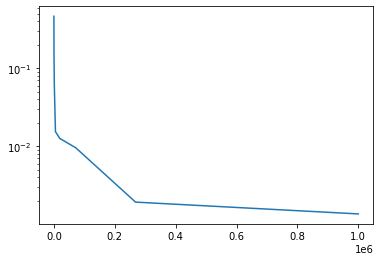

In [7]:
plt.plot(puntos,error)
plt.yscale('log')

En general es posible utilizar los puntos muestrales que siguen una dsitribución $g(x)$ para integrar una función $f(x)$. La siguiente aproximación de satisface:

$$ \frac{\int g(x)f(x)dx}{\int g(x)dx} = < f(x) > \approx \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) $$,

In [8]:
def Function(x):
    return x**2

def WeightedIntegral(N=1000, alpha=6):
    
    x = np.random.exponential(alpha,size=int(N))
    return np.average(Function(x))

print(WeightedIntegral(N=1e6,alpha=4))

31.91867636597045


Calcular la integral $\int_{0}^{\frac{\pi}{2}} xsin(x) dx$, notar los límites de integración!

In [9]:
def f(x):
    return x*np.sin(x)

In [10]:
def MCIntegral( N = 100 ):
    
    x = np.random.rand(int(N))*0.5*np.pi
    
    a = 0.
    b = 0.5*np.pi

    #return  (b-a)*np.average(f(x))
    return  (b-a)*np.sum(f(x))/N

In [11]:
print(MCIntegral(N=1e6))

0.9998100568090297


$$ \frac{1}{N} \sum_{i=1}^{N} f(x_{i}) = \frac{1}{b-a}\int_{a}^{b}f(x)dx $$

# Método de aceptación y rechazo

In [12]:
a = 0.7
b = np.pi

Part = 150

x = np.linspace(a,b,Part)

def f(x):
    y = 0.5*np.sin(x)
    return y

(0.0, 3.141592653589793)

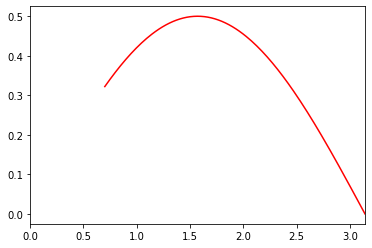

In [13]:
plt.plot(x,f(x),'r')
plt.xlim(0,b)

Generamos un punto $x_{i}$ de una distribución uniforme entre $a$ y $b$, para cada $x_{i}$, generamos un $y_{i}$ de una distribución uniforme entre 0 y el máximo de $f(x)$, nos preguntamos si $y_{i} < f(x_{i})$; si es verdadero incluimos el valor $x_{i}$ en la lista.

In [14]:
Npoints = 5e5

Ninside = 0
Ntrials = 0

lista = []

Max_ = 0.5

X = []
Y = []

Xa = []
Ya = []

while Ntrials < Npoints:
    
    xi = a+(b-a)*np.random.rand()
    
    yi = np.random.rand() * Max_
    
    X.append(xi)
    Y.append(yi)
    
    Ntrials +=1
    
    if yi < f(xi):
        
        Ninside +=1 
        lista.append(xi)
        Xa.append(xi)
        Ya.append(yi)
    

In [15]:
#plt.scatter(X,Y,color='b',alpha=0.3)
#plt.scatter(Xa,Ya,color='r')

In [16]:
Eff = Ninside/float(Ntrials)
I = Max_*Eff*(b-a)
print(I,Eff)

0.8826210947167885 0.722988


In [17]:
#plt.hist(lista,bins=x,density=True)
#plt.xlim(0,b)

In [18]:
H1, bines = np.histogram(lista,bins=x)
w = np.diff(bines)
print(len(bines),len(lista))

150 361494


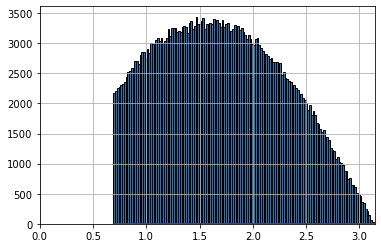

In [19]:
plt.bar(bines[:-1],H1,width=w,ec='k')
plt.xlim(0,b)
plt.plot(x,f(x),'r')
plt.grid()
plt.show()

In [20]:
print(np.sum(H1*w)) 
# Estas es el area del histograma, diferente a las entradas
print(w[0])
# Este es el ancho de bin

5923.631508166365
0.01638652787644157


In [21]:
integral = 0.

for i in range(len(H1)):
    integral += w[i]*H1[i]
    #print(H1[i])
print(integral)

5923.631508166368


In [22]:
# Normalizar el histograma

NormH1 = H1 / (np.sum(H1*w)) * I

print(np.sum(H1*w)) # Factor de normalización por bin / area el histograma

5923.631508166365


In [23]:
integral = 0.

for i in range(len(NormH1)):
    integral += w[i]*NormH1[i]
print(integral)

0.8826210947167884


En el caso de física de partículas, los histogramas de MonteCarlo se normalizan al número esperado de eventos.

$$ N =  \mathcal{L} \sigma \epsilon $$

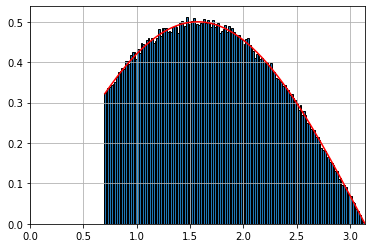

In [24]:
plt.bar(bines[:-1],NormH1,width=w,ec='k')
plt.xlim(0,b)
plt.plot(x,f(x),'r')
plt.grid()
plt.savefig('MC.png')
plt.show()